# People Detector

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
from datetime import datetime

#### data,current,power,timestamp,data,id,co2,data,weather,external_humidity,internal_humidity,external_temperature,internal_temperature,light_value,sunrise,sunset,timestamp,tvoc

In [2]:
dataDf = pd.read_csv('part-00000',index_col=False, skipinitialspace=True,infer_datetime_format=True,names=['data','current','power','timestamp','data_2','id','co2','data_3','weather','external_humidity','internal_humidity','external_temperature','internal_temperature','light_value','sunrise','sunset','timestamp_2','tvoc'])
dataDf1 = pd.read_csv('part-00001',index_col=False, skipinitialspace=True,infer_datetime_format=True,names=['data','current','power','timestamp','data_2','id','co2','data_3','weather','external_humidity','internal_humidity','external_temperature','internal_temperature','light_value','sunrise','sunset','timestamp_2','tvoc'])
dataDf2 = pd.read_csv('part-00002',index_col=False, skipinitialspace=True,infer_datetime_format=True,names=['data','current','power','timestamp','data_2','id','co2','data_3','weather','external_humidity','internal_humidity','external_temperature','internal_temperature','light_value','sunrise','sunset','timestamp_2','tvoc'])
dataDf3 = pd.read_csv('part-00003',index_col=False, skipinitialspace=True,infer_datetime_format=True,names=['data','current','power','timestamp','data_2','id','co2','data_3','weather','external_humidity','internal_humidity','external_temperature','internal_temperature','light_value','sunrise','sunset','timestamp_2','tvoc'])

dataDf = dataDf.append(dataDf1, ignore_index = True)
dataDf = dataDf.append(dataDf2, ignore_index = True)
dataDf = dataDf.append(dataDf3, ignore_index = True)

dataDf.describe()

,current,power,timestamp,light_value,timestamp_2
count,1.607580e+06,1.607580e+06,1.607580e+06,9.105680e+05,9.105680e+05
mean,6.087887e-01,1.400205e+02,1.572631e+12,4.728018e+04,1.573390e+09
std,1.324407e+00,3.046123e+02,2.138546e+09,6.074935e+04,2.056905e+06
min,1.100000e-01,2.628000e+01,1.568931e+12,3.000000e+00,1.568931e+09
25%,2.300000e-01,5.244000e+01,1.570778e+12,4.240000e+02,1.571453e+09
50%,3.400000e-01,7.913000e+01,1.572627e+12,1.465000e+03,1.573851e+09
75%,5.500000e-01,1.254400e+02,1.574486e+12,1.162250e+05,1.575103e+09
max,2.385000e+01,5.485740e+03,1.576339e+12,2.183203e+06,1.576251e+09


In [3]:
features = ['data','current','power','co2','weather','external_humidity','internal_humidity','external_temperature','internal_temperature','light_value','sunrise','sunset','tvoc']
dataDfProjection = dataDf[features].copy()
dataDfProjection.head()

#per ora metto tutte
requiredFeatures = ['data','current','power','co2','weather','external_humidity','internal_humidity','external_temperature','internal_temperature','light_value','sunrise','sunset','tvoc']
dataDfProjection = dataDfProjection.dropna(subset=requiredFeatures)

#Set correct type columns
dataDfProjection['external_humidity'] = dataDfProjection['external_humidity'].str.rstrip('%')
dataDfProjection['internal_humidity'] = dataDfProjection['internal_humidity'].str.rstrip('%')
dataDfProjection['external_temperature'] = dataDfProjection['external_temperature'].str.rstrip('*C')
dataDfProjection['internal_temperature'] = dataDfProjection['internal_temperature'].str.rstrip('*C')

numeric_features = ['co2','external_humidity','internal_humidity','external_temperature','internal_temperature','tvoc']
dataDfProjection[numeric_features] = dataDfProjection[numeric_features].apply(pd.to_numeric, errors='coerce')
dataDfProjection = dataDfProjection.dropna(subset=requiredFeatures)

dataDfProjection['data'] = pd.to_datetime(dataDfProjection['data'],format='%Y/%m/%d %H:%M') 

dataDfProjection.head()

,data,current,power,co2,weather,external_humidity,internal_humidity,external_temperature,internal_temperature,light_value,sunrise,sunset,tvoc
0,2019-11-07 17:47:00,0.20,44.93,404.8,Cloudy,95,67.0,10.0,19.0,118990.0,7:17 am,5:09 pm,7.0
1,2019-11-07 17:47:00,0.17,40.15,404.8,Cloudy,95,67.0,10.0,19.0,118990.0,7:17 am,5:09 pm,7.0
2,2019-11-07 17:47:00,0.19,42.66,404.8,Cloudy,95,67.0,10.0,19.0,118990.0,7:17 am,5:09 pm,7.0
3,2019-11-07 17:47:00,0.21,47.29,404.8,Cloudy,95,67.0,10.0,19.0,118990.0,7:17 am,5:09 pm,7.0
4,2019-11-07 17:47:00,0.17,40.02,404.8,Cloudy,95,67.0,10.0,19.0,118990.0,7:17 am,5:09 pm,7.0


#### Adding labels

In [5]:
def labelRow(row):
    weekno = row['data'].weekday()

    if weekno>=5:
        return -1 #it is a weekend

    h = row['data'].hour
    if (h >= 19 and h <= 21) or (h >= 7 and h <= 9):
        return 1
    elif h >= 3 and h <= 5:
        return 0
    else:
        return -1

dataDfProjection['peopleInHouse'] = dataDfProjection.apply(labelRow, axis=1)
dataDfProjection.drop(dataDfProjection[dataDfProjection.peopleInHouse == -1].index, inplace=True)
print(len(dataDfProjection[(dataDfProjection['peopleInHouse']==1)]))
print(len(dataDfProjection[(dataDfProjection['peopleInHouse']==0)]))


dataDfProjection.describe()

99530
43170


,current,power,co2,external_humidity,internal_humidity,external_temperature,internal_temperature,light_value,tvoc,peopleInHouse
count,142700.000000,142700.000000,142700.000000,142700.000000,142700.000000,142700.000000,142700.000000,142700.000000,142700.000000,142700.000000
mean,0.542381,124.742617,402.768631,91.699937,63.130827,7.205648,19.526475,51611.686496,0.743696,0.697477
std,1.142452,262.763367,5.381970,10.458938,3.609252,4.157404,0.896531,58885.065196,2.629355,0.459352
min,0.130000,29.640000,400.000000,49.000000,0.000000,-2.000000,0.000000,81.000000,0.000000,0.000000
25%,0.230000,52.680000,400.800000,90.000000,62.000000,5.000000,19.000000,1152.000000,0.000000,0.000000
50%,0.320000,72.620000,401.500000,95.000000,63.000000,7.000000,19.000000,2631.000000,0.000000,1.000000
75%,0.500000,114.150000,403.000000,100.000000,64.000000,8.000000,20.000000,116801.000000,1.000000,1.000000
max,17.060000,3923.500000,556.200000,100.000000,162.000000,22.000000,22.000000,318542.000000,210.000000,1.000000


In [6]:
input_features = ['power','co2','external_temperature','internal_temperature','tvoc']
X_train, X_test, y_train, y_test = train_test_split(dataDfProjection[input_features], dataDfProjection['peopleInHouse'], test_size=0.20, random_state=42)

#### Learn an ensamble model

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

clf = AdaBoostClassifier(n_estimators=200, random_state=0)
clf.fit(X_train, y_train)
print("Score: "+str(clf.score(X_test, y_test)))

print("Features importance: "+str(clf.feature_importances_))

confusion_matrix(y_test, clf.predict(X_test))

Score: 0.7607568325157673
Features importance: [0.18  0.125 0.555 0.07  0.07 ]


array([[ 4004,  4569],
       [ 2259, 17708]], dtype=int64)

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clf = BaggingClassifier(base_estimator=SVC(),n_estimators=5, random_state=0).fit(X_train, y_train)
print("Score: "+str(clf.score(X_test, y_test)))

confusion_matrix(y_test, clf.predict(X_test))

C:\Users\s.coluccia\AppData\Local\Continuum\anaconda3\envs\aaut_env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\s.coluccia\AppData\Local\Continuum\anaconda3\envs\aaut_env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\s.coluccia\AppData\Local\Continuum\anaconda3\envs\aaut_env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this

Score: 0.8470217238962859


array([[ 5903,  2670],
       [ 1696, 18271]], dtype=int64)

#### Plot the data

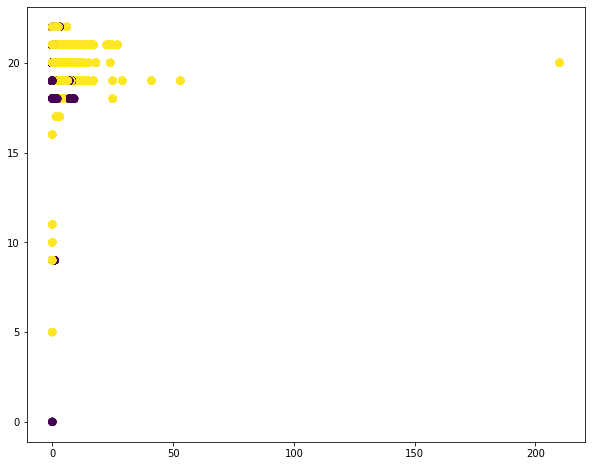

In [19]:
plt.figure(figsize=[10,8])
plt.scatter(dataDfProjection.tvoc, dataDfProjection.internal_temperature, s=50, c=dataDfProjection.peopleInHouse)

#### Trying with different features

In [9]:
input_features = ['power','co2','internal_humidity','light_value','internal_temperature','tvoc']
X_train, X_test, y_train, y_test = train_test_split(dataDfProjection[input_features], dataDfProjection['peopleInHouse'], test_size=0.20, random_state=42)

clf = AdaBoostClassifier(n_estimators=200, random_state=0)
clf.fit(X_train, y_train)
print("Score: "+str(clf.score(X_test, y_test)))

print("Features importance: "+str(clf.feature_importances_))

confusion_matrix(y_test, clf.predict(X_test))

Score: 0.9562718990889979
Features importance: [0.12  0.08  0.09  0.585 0.1   0.025]


array([[ 8257,   316],
       [  932, 19035]], dtype=int64)

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clf = BaggingClassifier(base_estimator=SVC(),n_estimators=5, random_state=0).fit(X_train, y_train)
print("Score: "+str(clf.score(X_test, y_test)))

confusion_matrix(y_test, clf.predict(X_test))

C:\Users\s.coluccia\AppData\Local\Continuum\anaconda3\envs\aaut_env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\s.coluccia\AppData\Local\Continuum\anaconda3\envs\aaut_env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\s.coluccia\AppData\Local\Continuum\anaconda3\envs\aaut_env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this

Score: 0.9813244569025928


array([[ 8042,   531],
       [    2, 19965]], dtype=int64)

In [12]:
from joblib import dump, load
dump(clf, 'peopleDetector_bag.joblib')

['peopleDetector_bag.joblib']

In [16]:
X_test.head()

,power,co2,internal_humidity,light_value,internal_temperature,tvoc
815731,76.31,405.3,63.0,503.0,21.0,1.0
966159,40.28,401.8,63.0,372.0,19.0,1.0
658842,146.03,407.1,66.0,1625.0,20.0,8.0
615372,103.83,401.7,62.0,112131.0,19.0,1.0
168377,54.17,400.8,65.0,484.0,19.0,1.0
